In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
plt.style.use('ggplot')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [3]:
X_train = np.loadtxt('data/X_train.txt')
y_train = np.loadtxt('data/y_train.txt')
X_test = np.loadtxt('data/X_test.txt')

In [4]:
print X_train.shape, X_test.shape
print 'Number of times it rained', y_train.sum()

(100000, 14) (100000, 14)
Number of times it rained 34122.0


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [6]:
df = pd.DataFrame(X_train)
df['rain'] = y_train

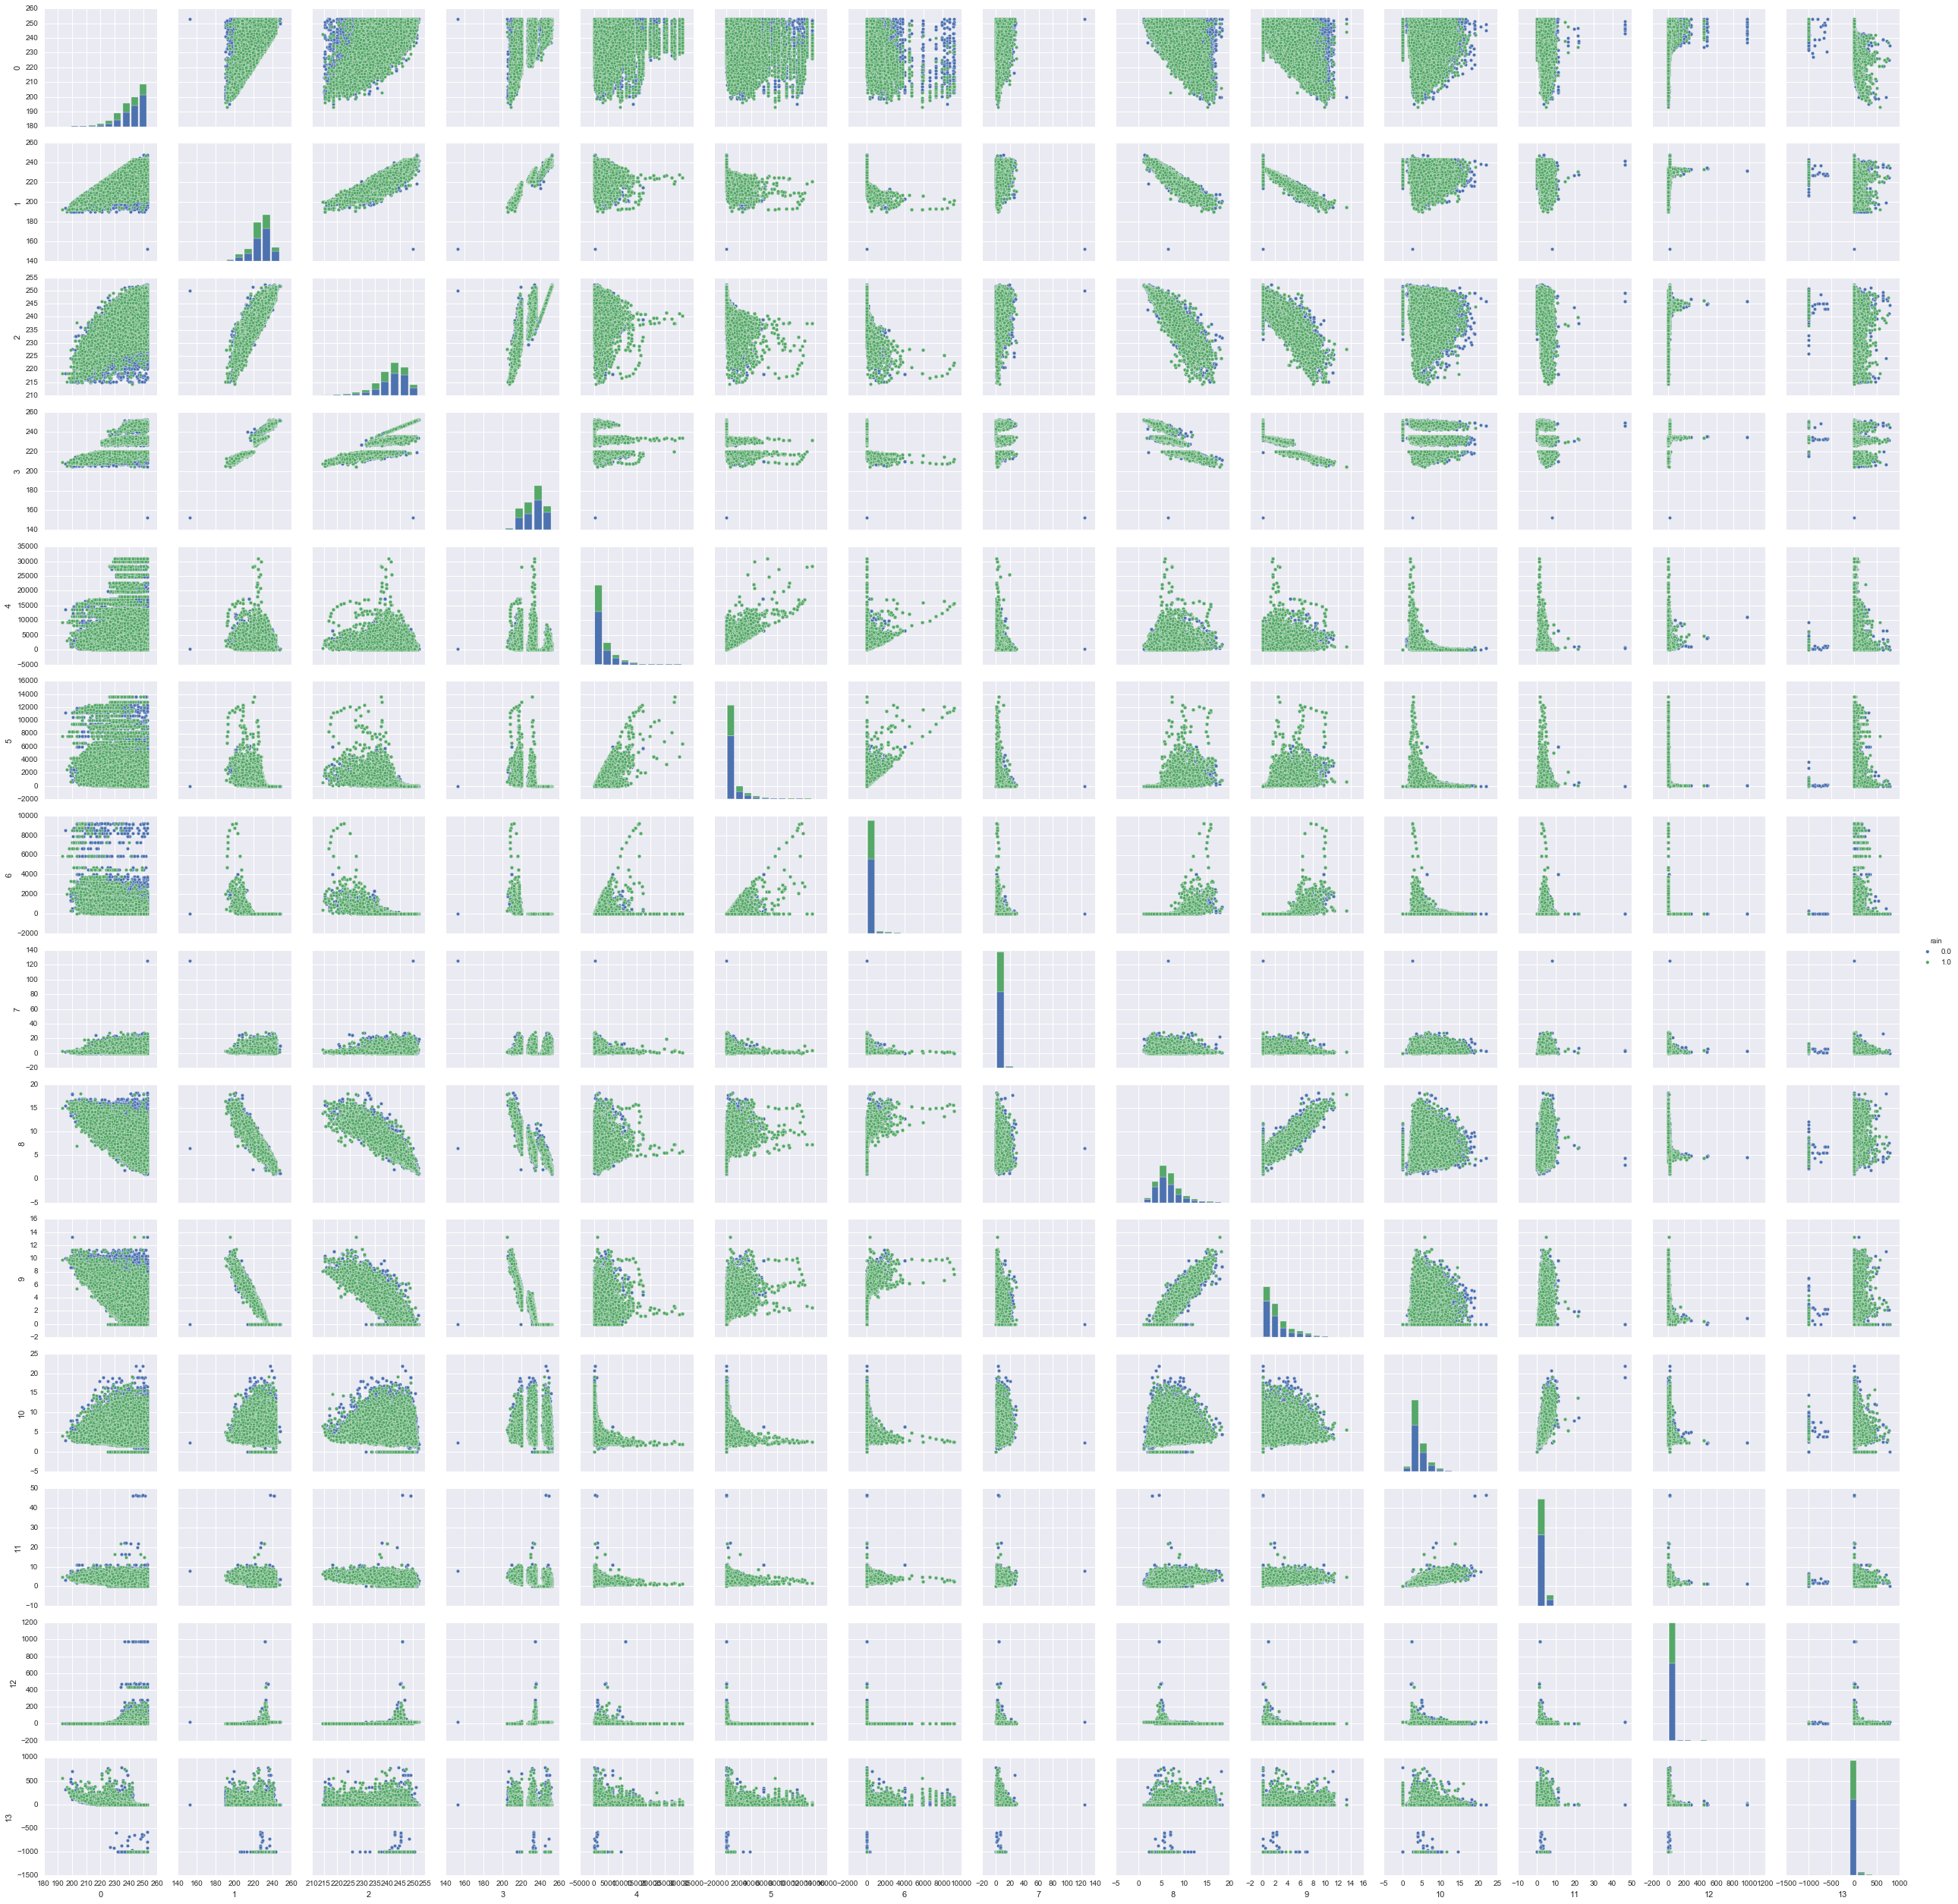

In [6]:
sns.pairplot(df, hue='rain', vars=range(14))

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,rain
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,241.572498,227.368388,241.551366,232.803211,3083.644156,920.919689,136.837333,3.254905,6.501893,2.096467,4.221998,2.692019,10.297051,5.663773,0.342733
std,9.157977,9.599685,5.938488,9.862890,3949.011894,1736.750482,661.137476,2.869513,2.528577,2.088713,2.010485,1.453090,21.401901,59.339414,0.474626
min,193.000000,152.500000,214.250000,152.500000,10.000000,0.000000,0.000000,0.000000,1.103100,0.000000,0.000000,0.000000,1.022100,-999.900000,0.000000
25%,236.000000,223.000000,238.540000,230.400000,557.000000,8.000000,0.000000,1.445300,4.794475,0.385690,2.859100,1.694325,1.956300,0.000000,0.000000
50%,243.000000,229.000000,242.450000,232.980000,1651.000000,213.000000,0.000000,2.320500,6.147100,1.643600,3.687050,2.342350,4.070900,0.000000,0.000000
75%,249.000000,234.000000,245.830000,234.760000,4145.000000,1036.000000,0.000000,4.079700,7.784200,2.983200,5.062000,3.340800,20.000000,0.300000,1.000000
max,253.000000,248.000000,252.380000,252.380000,31048.000000,13630.000000,9238.000000,125.170000,18.336000,13.230000,21.890000,46.544000,975.040000,782.500000,1.000000


In [8]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predictions_val = clf.predict(X_val)
print 'Accuracy', np.mean(predictions_val == y_val)

Accuracy 0.6958


In [26]:
print predictions_val.sum(), y_val.sum()

1205.0 3276.0


In [45]:
np.linspace(0.1, 10, 50)

array([  0.1       ,   0.30204082,   0.50408163,   0.70612245,
         0.90816327,   1.11020408,   1.3122449 ,   1.51428571,
         1.71632653,   1.91836735,   2.12040816,   2.32244898,
         2.5244898 ,   2.72653061,   2.92857143,   3.13061224,
         3.33265306,   3.53469388,   3.73673469,   3.93877551,
         4.14081633,   4.34285714,   4.54489796,   4.74693878,
         4.94897959,   5.15102041,   5.35306122,   5.55510204,
         5.75714286,   5.95918367,   6.16122449,   6.36326531,
         6.56530612,   6.76734694,   6.96938776,   7.17142857,
         7.37346939,   7.5755102 ,   7.77755102,   7.97959184,
         8.18163265,   8.38367347,   8.58571429,   8.7877551 ,
         8.98979592,   9.19183673,   9.39387755,   9.59591837,
         9.79795918,  10.        ])

In [25]:
acc = []
for reg in np.linspace(0.1, 10, 50):
    clf = LogisticRegression(C=reg)
    clf.fit(X_train, y_train)
    predictions_val = clf.predict(X_val)
    acc.append(np.mean(predictions_val == y_val))

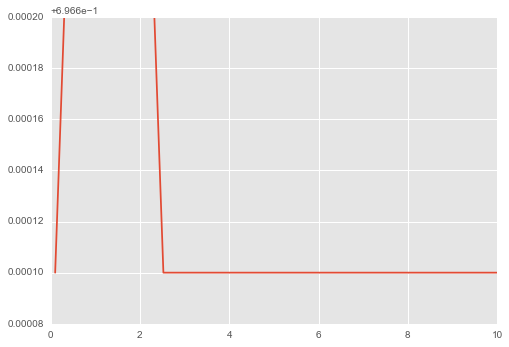

In [47]:
plt.plot(np.linspace(0.1, 10, 50), acc)

In [32]:
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)

In [33]:
X_train_scale = scaler.transform(X_train)

In [34]:
pd.DataFrame(X_train_scale).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04,9.000000e+04
mean,-2.550865e-13,1.903377e-15,4.272856e-13,-4.675513e-13,-4.186404e-17,2.843479e-16,9.581410e-16,-1.798859e-14,-3.326196e-14,-1.163730e-15,4.068661e-14,2.079555e-14,6.051836e-15,2.544811e-15
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-5.303875e+00,-7.799090e+00,-4.597385e+00,-8.142000e+00,-7.783368e-01,-5.302574e-01,-2.069737e-01,-1.134312e+00,-2.135123e+00,-1.003718e+00,-2.100002e+00,-1.852628e+00,-4.333728e-01,-1.694606e+01
25%,-6.084890e-01,-4.550579e-01,-5.070958e-01,-2.436633e-01,-6.398204e-01,-5.256511e-01,-2.069737e-01,-6.306348e-01,-6.752523e-01,-8.190626e-01,-6.778989e-01,-6.866057e-01,-3.897223e-01,-9.544760e-02
50%,1.558761e-01,1.699661e-01,1.513246e-01,1.792480e-02,-3.627875e-01,-4.076139e-01,-2.069737e-01,-3.256336e-01,-1.403140e-01,-2.168176e-01,-2.660804e-01,-2.406397e-01,-2.909174e-01,-9.544760e-02
75%,8.110463e-01,6.908194e-01,7.204962e-01,1.984003e-01,2.687664e-01,6.626222e-02,-2.069737e-01,2.874354e-01,5.071289e-01,4.245378e-01,4.178132e-01,4.464862e-01,4.533711e-01,-9.039191e-02
max,1.247826e+00,2.149209e+00,1.823477e+00,1.984905e+00,7.081395e+00,7.317776e+00,1.376599e+01,4.248657e+01,4.680171e+00,5.330361e+00,8.787981e+00,3.017861e+01,4.507769e+01,1.309148e+01


In [36]:
acc = []
X_val_scale = scaler.transform(X_val)
for reg in np.linspace(0.1, 10, 50):
    clf = LogisticRegression(C=reg)
    clf.fit(X_train_scale, y_train)
    predictions_val = clf.predict(X_val_scale)
    acc.append(np.mean(predictions_val == y_val))

(0.6, 0.7)

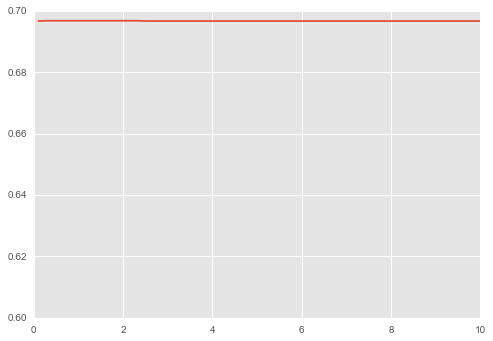

In [40]:
plt.plot(np.linspace(0.1, 10, 50), acc)
plt.ylim(0.6, 0.7)

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
ada_clf = AdaBoostClassifier()

In [43]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [44]:
print np.mean(ada_clf.predict(X_val) == y_val)

0.6992


In [48]:
ada_predictions = ada_clf.predict(X_val)

In [50]:
print ada_predictions.sum(), y_val.sum()

1546.0 3276.0


In [51]:
X_train[y_train == 1]

array([[ 249.    ,  212.    ,  234.49  , ...,    3.1985,    1.603 ,    0.    ],
       [ 239.    ,  229.    ,  243.66  , ...,    2.4155,  108.03  ,    0.    ],
       [ 245.    ,  236.    ,  245.55  , ...,    1.491 ,   20.    ,    0.    ],
       ..., 
       [ 241.5   ,  239.    ,  248.31  , ...,    2.457 ,   20.    ,  259.8   ],
       [ 234.    ,  225.    ,  238.6   , ...,    2.7471,    2.8825,    0.    ],
       [ 242.    ,  230.    ,  240.98  , ...,    2.6729,    1.9958,    0.    ]])